<a href="https://colab.research.google.com/github/ashwinimandlay/PyTorch_youtube/blob/main/4_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import torch
import torch.nn as nn

In [102]:
import torch.nn.functional as F

In [103]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 feature of the flower) --> Hidden layer1 (number of neurons) --> H2 (n) --> output(3 classes of iris flower)
  def __init__(self, in_features = 4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [104]:
# pick a random seed
torch.manual_seed(41)
# create a instance of model
model = Model()

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [107]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [108]:
# change last column from string to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

<ipython-input-108-261b292de83a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [109]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [110]:
# train test and split string
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [111]:
# convert these to numpy arrays
X = X.values
y = y.values

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [114]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [115]:
# convert y labels to tensors long
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [116]:
# set the crieterian of model to measure the error , how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer, lr= learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)


In [117]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [118]:
# train our Model
# Epochs? one run through all the training data in our network
epochs = 500
losses = []
for i in range(epochs):
  # go forward and get prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/ error, gonna be high at first
  loss = criterion(y_pred, y_train.long())

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

    # do backpropagation: take the error rate of forward propagation and feed it back
    # trugh the network to fine tune the weights

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss : 1.125203251838684
Epoch: 10 and loss : 1.1171891689300537
Epoch: 20 and loss : 1.1095616817474365
Epoch: 30 and loss : 1.102453351020813
Epoch: 40 and loss : 1.0959337949752808
Epoch: 50 and loss : 1.0898849964141846
Epoch: 60 and loss : 1.084144949913025
Epoch: 70 and loss : 1.078583836555481
Epoch: 80 and loss : 1.073133111000061
Epoch: 90 and loss : 1.067759394645691
Epoch: 100 and loss : 1.0624120235443115
Epoch: 110 and loss : 1.057084083557129
Epoch: 120 and loss : 1.0517750978469849
Epoch: 130 and loss : 1.046431064605713
Epoch: 140 and loss : 1.0409501791000366
Epoch: 150 and loss : 1.0352940559387207
Epoch: 160 and loss : 1.0294221639633179
Epoch: 170 and loss : 1.0232106447219849
Epoch: 180 and loss : 1.016089916229248
Epoch: 190 and loss : 1.0075243711471558
Epoch: 200 and loss : 0.9992011785507202
Epoch: 210 and loss : 0.9929736852645874
Epoch: 220 and loss : 0.9853506088256836
Epoch: 230 and loss : 0.9760571718215942
Epoch: 240 and loss : 0.966493725776

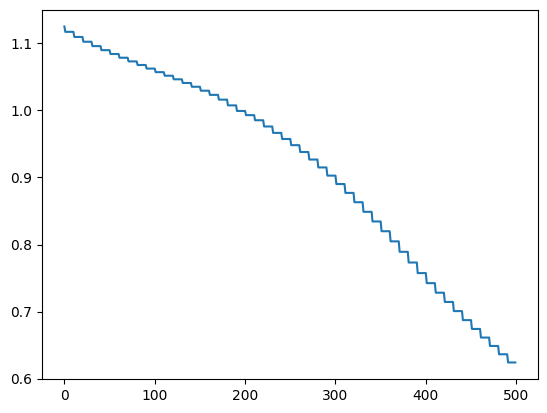

In [119]:
plt.plot(range(epochs), losses)